# 11 Year Dengue cases Exploratory Analysis

## Key Metrics
- Total Cases
- Peak Month Index
- Top affected City/ies
- Survival Rate
- Case Fatality Ratio

## Analysis Parts
- **Overall dengue case trend** - bar graph/line graph (Year x Cases)
- **Annual dengue case pattern** - bar graph/line graph (Month x Cases)
- **Time series each month (for every city/municipality)** - to measure if cases are going up or down for each municipality/city (linear time series plot)
- **Dengue case hotspot** - to measure which place has the most and least cases (heatmap)
- **Human Impact** - deaths for cases/case fatality ratio, or CFR (stacked bar graph)

In [13]:
# libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.plotting.register_matplotlib_converters()
sns.set_style(style='darkgrid')

In [14]:
# importing the file
dengue_case = pd.read_csv('../data-cleaning/combined-data.csv')

dengue_case['Date'] = pd.to_datetime(dengue_case['Year'].astype(str) + '-' + dengue_case['Month'].astype(str) + '-01')

dengue_case.head()

,City/Municipality,Month,Year,Alive,Death,Cases,Date
0,ALFONSO,January,2014,1,1.0,2.0,2014-01-01
1,ALFONSO,February,2014,1,0.0,1.0,2014-02-01
2,ALFONSO,March,2014,2,0.0,2.0,2014-03-01
3,ALFONSO,April,2014,1,0.0,1.0,2014-04-01
4,ALFONSO,May,2014,1,0.0,1.0,2014-05-01


### Key Metrics

In [36]:
# Total cases
total_cases = dengue_case["Cases"].sum()

# Peak Month Index
peak_month = dengue_case.groupby("Month")["Cases"].sum().idxmax()

# Top affected city
top_city = dengue_case.groupby("City/Municipality")["Cases"].sum().idxmax()

# Survival Rate
survival_rate = (dengue_case["Alive"].sum() / total_cases) * 100

# Case Fatality Ratio (CFR)
cfr = (dengue_case["Death"].sum() / total_cases) * 100

print("Total Cases:", total_cases)
print("Peak Month:", peak_month)
print("Top Affected City:", top_city)
print(f"Survival Rate: {survival_rate:.2f}%")
print(f"Case Fatality Ratio: {cfr:.2f}%")


Total Cases: 88639.0
Peak Month: October
Top Affected City: DASMARINAS
Survival Rate: 99.63%
Case Fatality Ratio: 0.37%


### Overall Dengue case trend

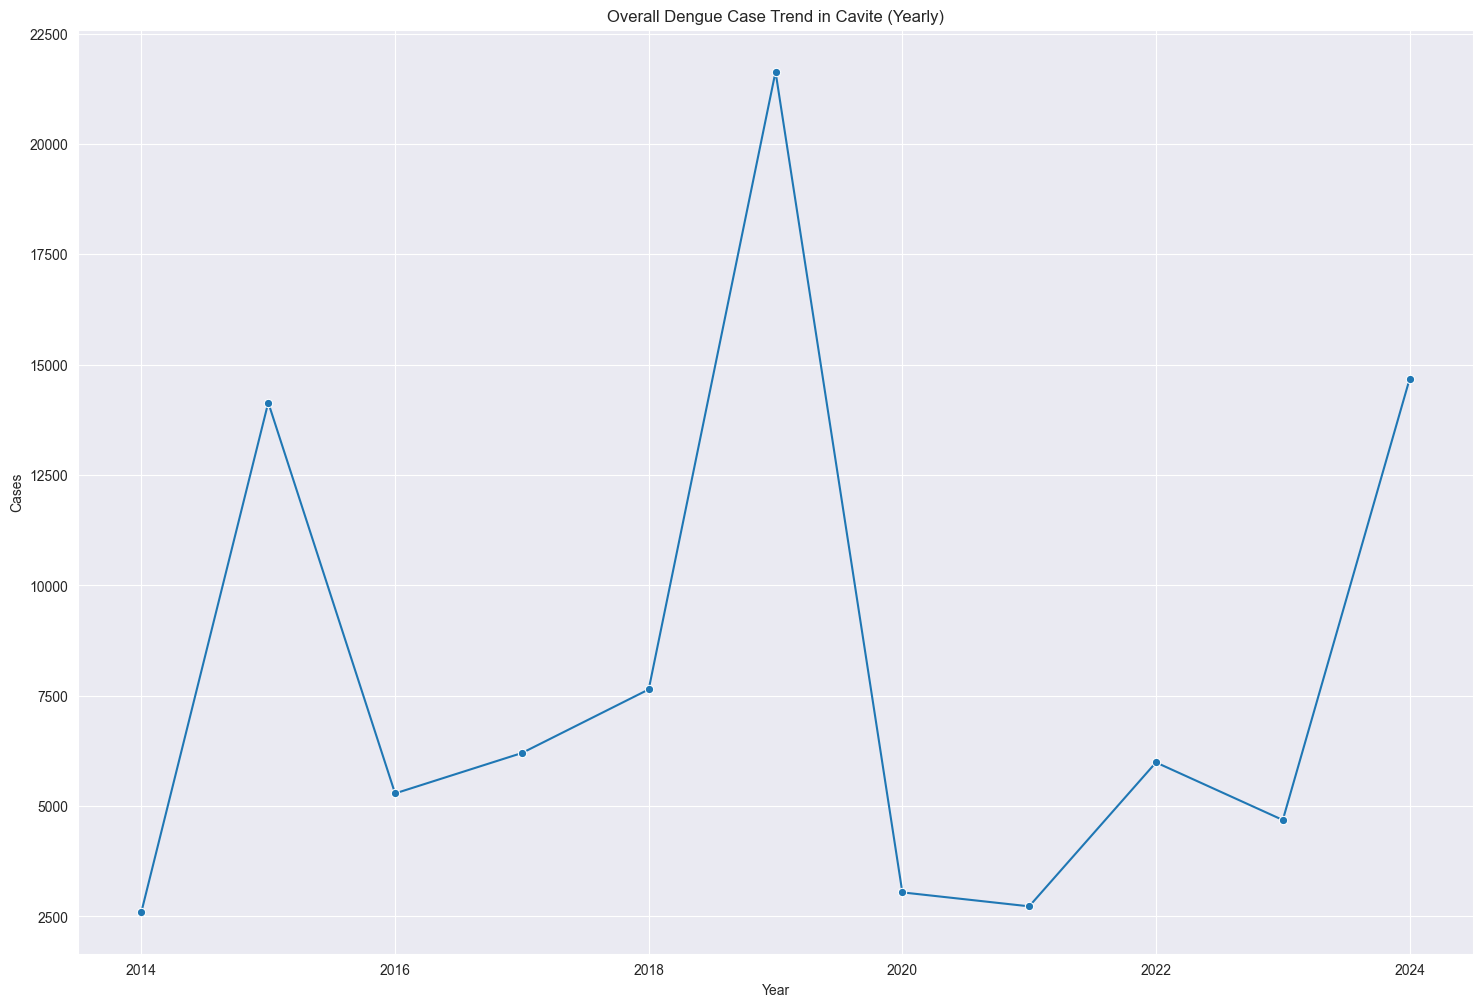

In [24]:
yearly = dengue_case.groupby("Year")["Cases"].sum().reset_index()

plt.figure(figsize=(18,12))
sns.lineplot(data=yearly, x="Year", y="Cases", marker="o")
plt.title("Overall Dengue Case Trend in Cavite (Yearly)")
plt.show()

### Annual dengue case pattern

C:\Users\Admin\AppData\Local\Temp\ipykernel_22184\2889947374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly, x="Month", y="Cases", palette="Blues_d")


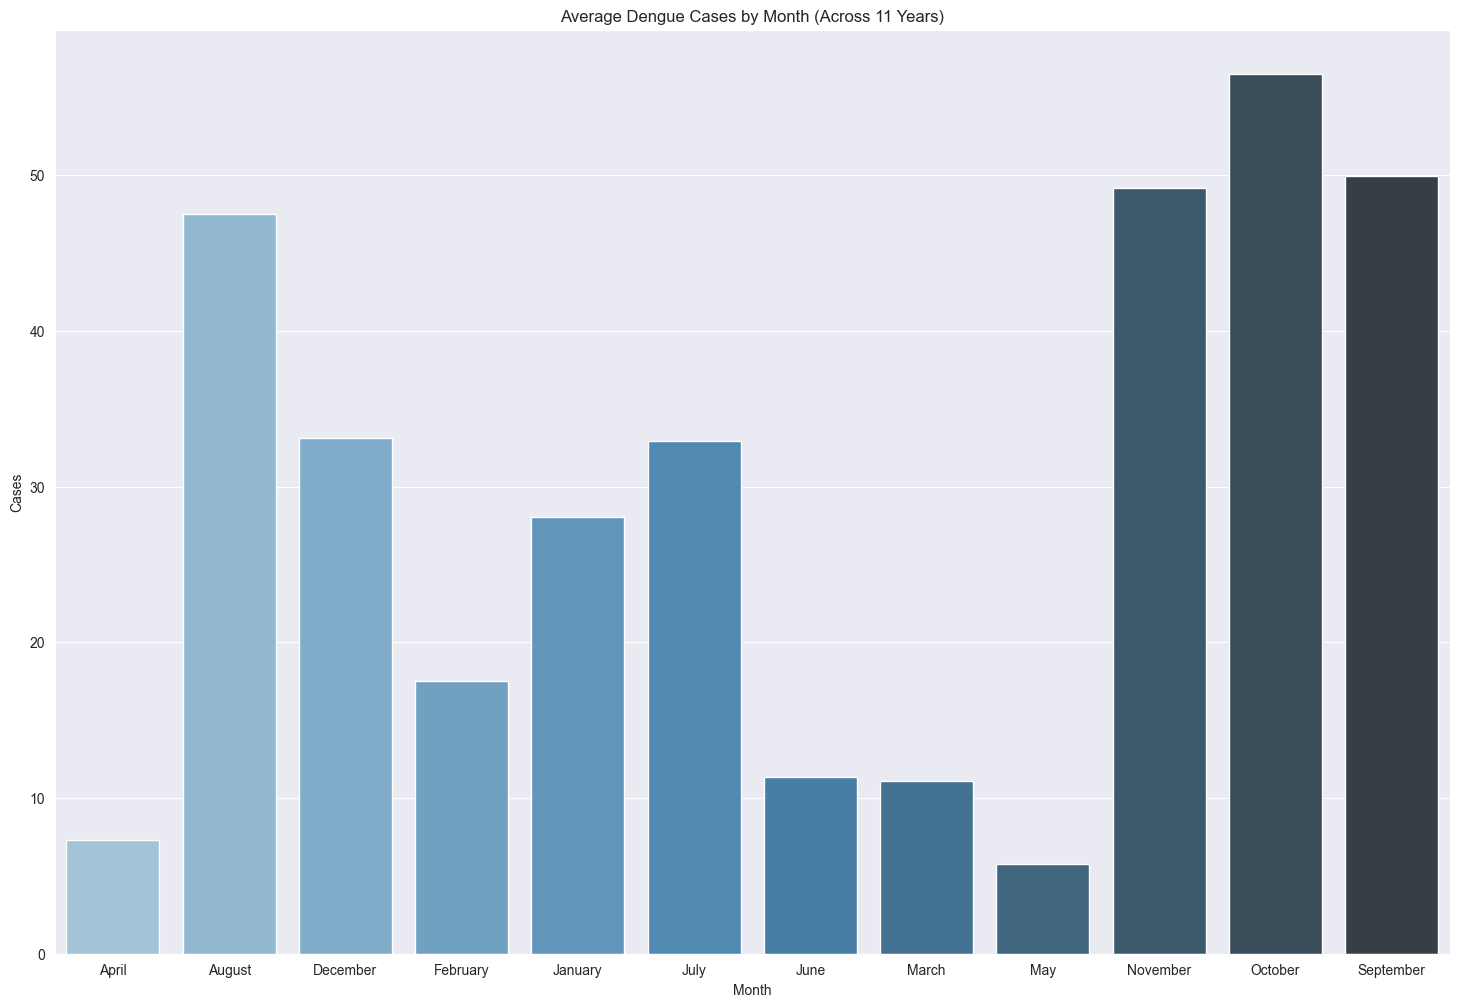

In [23]:
monthly = dengue_case.groupby("Month")["Cases"].mean().reset_index()

plt.figure(figsize=(18,12))
sns.barplot(data=monthly, x="Month", y="Cases", palette="Blues_d")
plt.title("Average Dengue Cases by Month (Across 11 Years)")
plt.show()


### Time series each month (for every city/municipality)

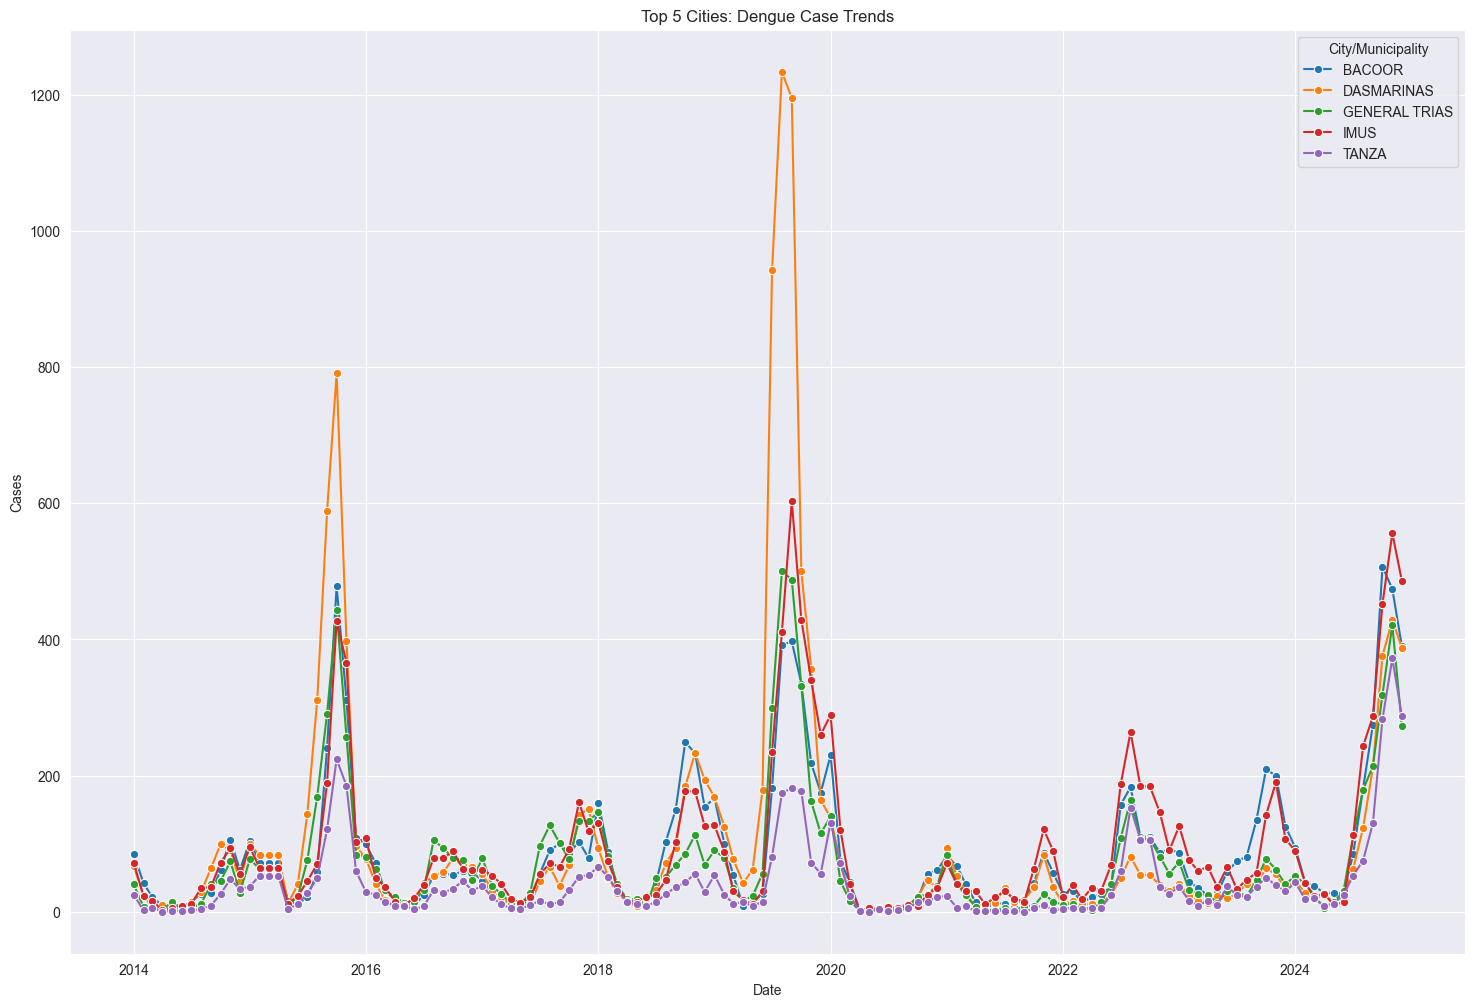

In [22]:
top_cities = dengue_case.groupby("City/Municipality")["Cases"].sum().nlargest(5).index
subset = dengue_case[dengue_case["City/Municipality"].isin(top_cities)]

plt.figure(figsize=(18,12))
sns.lineplot(data=subset, x="Date", y="Cases", hue="City/Municipality", marker="o")
plt.title("Top 5 Cities: Dengue Case Trends")
plt.show()


### Dengue case hotspot

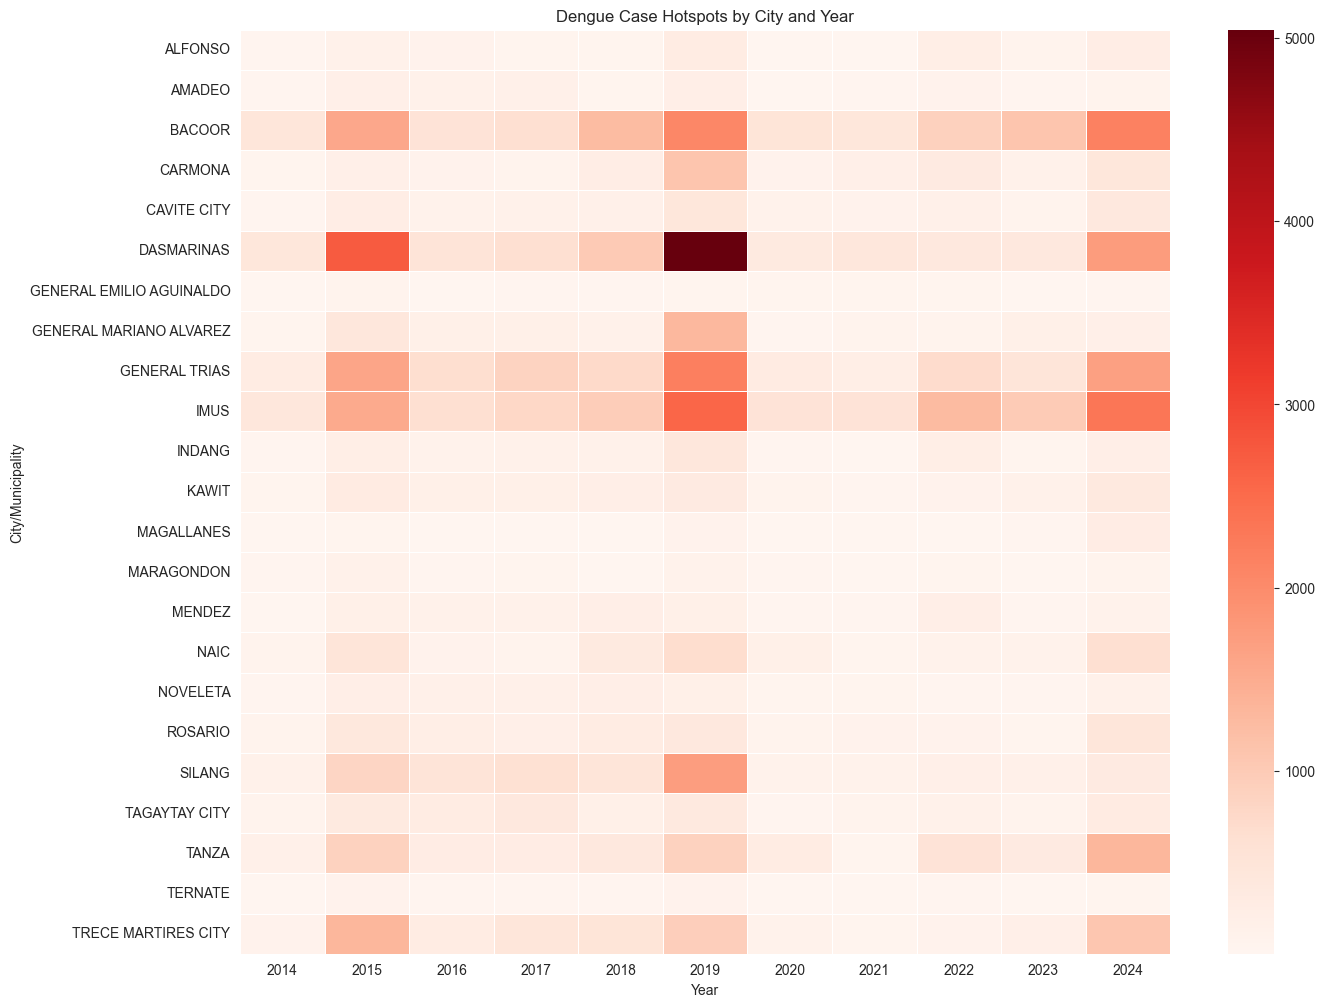

In [ ]:
heatmap_data = dengue_case.pivot_table(values="Cases", index="City/Municipality", columns="Year", aggfunc="sum").fillna(0)

plt.figure(figsize=(15,12))
sns.heatmap(heatmap_data, cmap="Reds", annot=False, linewidths=.5)
plt.title("Dengue Case Hotspots by City and Year")
plt.show()


### Human Impact

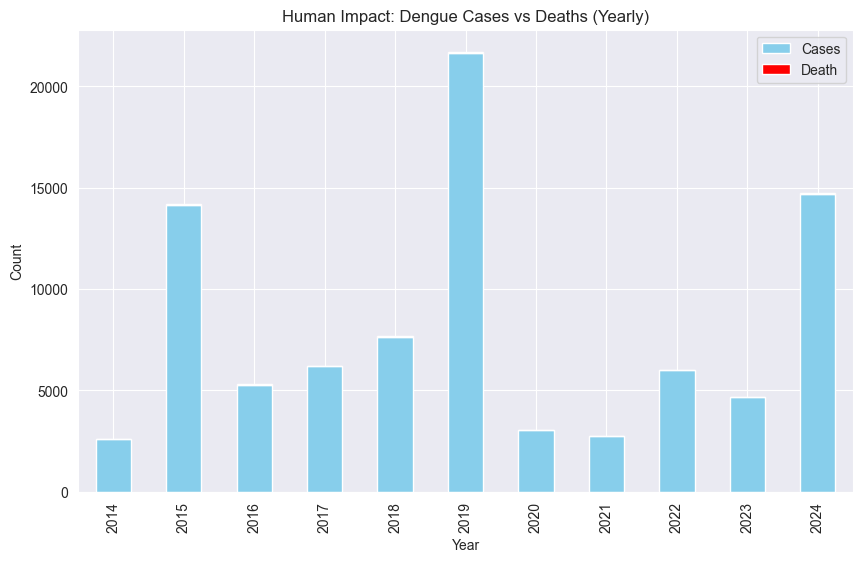

In [32]:
dengue_case["CFR"] = (dengue_case["Death"] / dengue_case["Cases"]) * 100

human_impact = dengue_case.groupby("Year")[["Cases", "Death"]].sum().reset_index()

human_impact.plot(
    x="Year", kind="bar", stacked=True, figsize=(10,6),
    color=["skyblue", "red"]
)

# plt.figure(figsize=(10,12))
plt.title("Human Impact: Dengue Cases vs Deaths (Yearly)")
plt.ylabel("Count")
plt.show()
